In [345]:
## Import Modules
import numpy as np
import pandas as pd
from os import chdir
import os
import statistics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
%matplotlib inline

In [3]:
## Change working directory
os.chdir('C:\\Users\\rimo\\Desktop')
os.getcwd()

'C:\\Users\\rimo\\Desktop'

In [58]:
## Load text files via read_csv

school = pd.read_csv('school_grades_dataset.csv', sep = ',')

In [11]:
#649 observations X 33 features
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [12]:
school.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [392]:
school.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [17]:
# Seperate the target attribute
final_grade = school['G3']
final_grade.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

Text(0.5, 0, 'Final Grade')

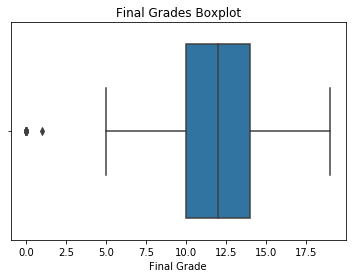

In [393]:
#Exploratory analysis for target data
import seaborn as sns
sns.boxplot(final_grade)
plot.title('Final Grades Boxplot')
plot.xlabel('Final Grade')

In [35]:
final_grade.describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [68]:
#Exploratory Analysis for Categorial data in terms of Final School Grade
#"student's school (binary: ""GP"" Gabriel Pereira or ""MS"" Mousinho da Silveira)"
school[['school','G3']].groupby("school").describe()

G3                                                  
        count       mean       std  min   25%   50%   75%   max
school                                                         
GP      423.0  12.576832  2.625636  0.0  11.0  13.0  14.0  19.0
MS      226.0  10.650442  3.833991  0.0   9.0  11.0  13.0  19.0

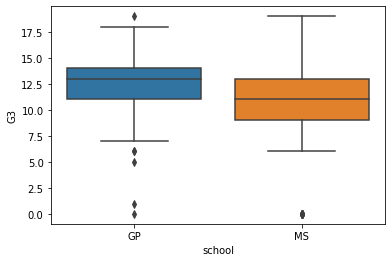

In [398]:
g3 = school[['school','G3']]
sns.boxplot(x='school', y='G3', data=g3)

In [70]:
#"student's sex (binary: ""F"" female or ""M"" male)"
school[['sex','G3']].groupby("sex").describe()

G3                                                  
     count       mean       std  min   25%   50%   75%   max
sex                                                         
F    383.0  12.253264  3.124147  0.0  10.0  12.0  14.0  19.0
M    266.0  11.406015  3.320690  0.0  10.0  11.0  13.0  19.0

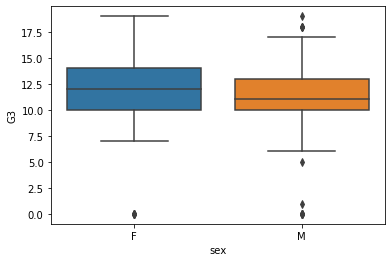

In [399]:
sex = school[['sex','G3']]
sns.boxplot(x='sex', y='G3', data=sex)

In [71]:
#student's age (numeric: from 15 to 22)
school[['age','G3']].groupby("age").describe()

G3                                                    
     count       mean       std   min   25%   50%    75%   max
age                                                           
15   112.0  12.107143  2.085372   8.0  11.0  12.0  14.00  18.0
16   177.0  11.994350  2.883135   0.0  11.0  12.0  14.00  18.0
17   179.0  12.268156  3.149040   0.0  10.0  12.0  15.00  19.0
18   140.0  11.771429  4.154122   0.0  10.0  12.0  15.00  19.0
19    32.0   9.531250  3.407623   0.0   9.0  10.0  11.00  14.0
20     6.0  12.000000  2.449490  10.0  10.0  11.0  14.25  15.0
21     2.0  11.000000  1.414214  10.0  10.5  11.0  11.50  12.0
22     1.0   5.000000       NaN   5.0   5.0   5.0   5.00   5.0

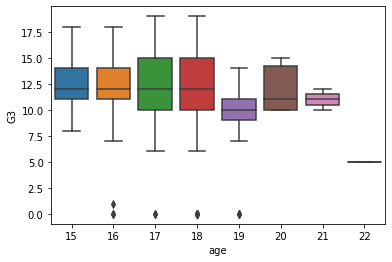

In [400]:
age = school[['age','G3']]
sns.boxplot(x='age', y='G3', data=age)

In [72]:
#"student's home address type (binary: ""U"" urban or ""R"" rural)"
school[['address','G3']].groupby("address").describe()

G3                                                  
         count       mean       std  min   25%   50%   75%   max
address                                                         
R        197.0  11.086294  3.605221  0.0  10.0  11.0  13.0  19.0
U        452.0  12.263274  2.987658  0.0  10.0  12.0  14.0  19.0

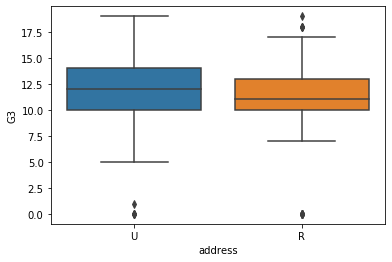

In [402]:
address = school[['address','G3']]
sns.boxplot(x='address', y='G3', data=address)

In [73]:
#"family size (binary: ""LE3"" less or equal to 3 or ""GT3"" greater than 3)"
school[['famsize','G3']].groupby("famsize").describe()

G3                                                  
         count       mean       std  min   25%   50%   75%   max
famsize                                                         
GT3      457.0  11.811816  3.351426  0.0  10.0  12.0  14.0  19.0
LE3      192.0  12.130208  2.919285  0.0  10.0  12.0  14.0  19.0

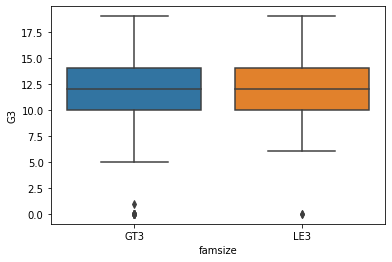

In [403]:
famsize = school[['famsize','G3']]
sns.boxplot(x='famsize', y='G3', data=famsize)

In [75]:
#"parent's cohabitation status (binary: ""T"" living together or ""A"" apart)"
school[['Pstatus','G3']].groupby("Pstatus").describe()

G3                                                  
         count       mean       std  min   25%   50%   75%   max
Pstatus                                                         
A         80.0  11.912500  3.222523  0.0  10.0  12.0  14.0  18.0
T        569.0  11.905097  3.234626  0.0  10.0  12.0  14.0  19.0

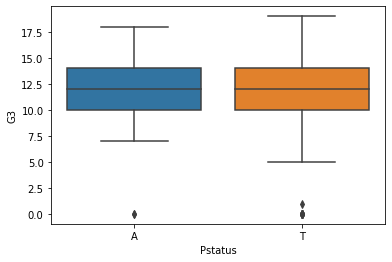

In [404]:
Pstatus = school[['Pstatus','G3']]
sns.boxplot(x='Pstatus', y='G3', data=Pstatus)

In [77]:
#"mother's education (numeric: 0: none,   1: primary education (4th grade),  2: 5th to 9th grade,
#3 _ secondary education or 4 _ higher education)"
school[['Medu','G3']].groupby("Medu").describe()

G3                                                    
      count       mean       std   min   25%   50%    75%   max
Medu                                                           
0       6.0  11.666667  1.751190  10.0  11.0  11.0  11.75  15.0
1     143.0  10.797203  3.163523   0.0   9.0  11.0  13.00  18.0
2     186.0  11.661290  3.061232   0.0  10.0  12.0  13.00  18.0
3     139.0  11.920863  3.123229   0.0  10.0  12.0  14.00  19.0
4     175.0  13.068571  3.236978   0.0  11.0  13.0  15.00  19.0

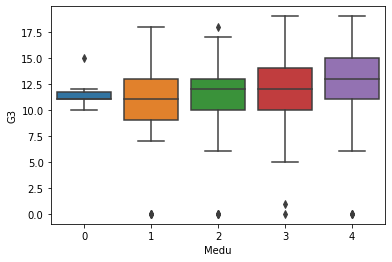

In [405]:
Medu = school[['Medu','G3']]
sns.boxplot(x='Medu', y='G3', data=Medu)

In [78]:
#"father's education (numeric: 0 - none,   1 - primary education (4th grade),  2 _ 5th to
#9th grade,  3 _ secondary education or 4 _ higher education)"
school[['Fedu','G3']].groupby("Fedu").describe()

G3                                                   
      count       mean       std   min   25%   50%   75%   max
Fedu                                                          
0       7.0  12.142857  2.794553  10.0  10.5  11.0  12.5  18.0
1     174.0  10.936782  3.424077   0.0   9.0  11.0  13.0  19.0
2     209.0  11.784689  3.448321   0.0  10.0  12.0  14.0  18.0
3     131.0  12.381679  2.491394   1.0  11.0  12.0  14.0  18.0
4     128.0  12.921875  2.915096   0.0  11.0  13.0  15.0  19.0

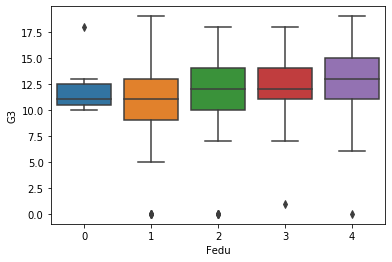

In [406]:
Fedu = school[['Fedu','G3']]
sns.boxplot(x='Fedu', y='G3', data=Fedu)

In [79]:
cross = pd.crosstab(school["Medu"], school["Fedu"])
cross

Fedu,0,1,2,3,4
Medu,,,,,
0,1,2,3,0,0
1,5,92,36,8,2
2,0,52,101,25,8
3,0,20,42,54,23
4,1,8,27,44,95


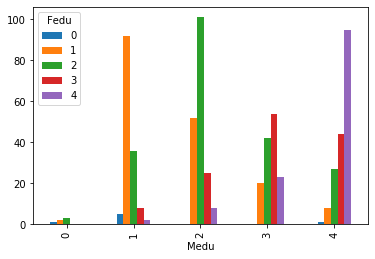

In [80]:
plt.show(cross.plot(kind="bar"))

In [82]:
#"mother's job (nominal: ""teacher"",  ""health"" care related,  civil ""services"" 
#(e.g. administrative or police),  ""at_home"" or ""other"")"
school[['Mjob','G3']].groupby("Mjob").describe()

G3                                                   
          count       mean       std  min    25%   50%   75%   max
Mjob                                                              
at_home   135.0  11.044444  3.138273  0.0  10.00  11.0  13.0  18.0
health     48.0  13.062500  2.956466  8.0  10.75  13.0  15.0  18.0
other     258.0  11.670543  3.307224  0.0  10.00  12.0  14.0  18.0
services  136.0  12.147059  2.917456  0.0  10.00  12.0  14.0  19.0
teacher    72.0  13.138889  3.307293  0.0  11.00  13.0  15.0  19.0

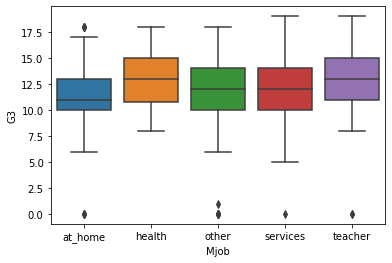

In [410]:
Mjob = school[['Mjob','G3']]
sns.boxplot(x='Mjob', y='G3', data=Mjob)

In [83]:
#"father's job (nominal: ""teacher"",  ""health"" care related,  civil ""services"" 
#(e.g. administrative or police),  ""at_home"" or ""other"")"
school[['Fjob','G3']].groupby("Fjob").describe()

G3                                                  
          count       mean       std  min   25%   50%   75%   max
Fjob                                                             
at_home    42.0  11.428571  3.201698  0.0  10.0  11.0  14.0  18.0
health     23.0  12.565217  3.130874  6.0  10.0  12.0  15.0  18.0
other     367.0  11.891008  3.074503  0.0  10.0  12.0  14.0  19.0
services  181.0  11.629834  3.438507  0.0  10.0  12.0  14.0  18.0
teacher    36.0  13.583333  3.400630  0.0  12.0  14.0  16.0  19.0

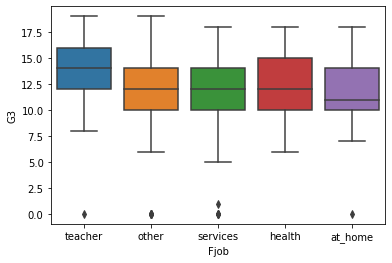

In [412]:
Fjob = school[['Fjob','G3']]
sns.boxplot(x='Fjob', y='G3', data=Fjob)

In [87]:
cross_job = pd.crosstab(school["Fjob"], school["Mjob"])
cross_job

Mjob,at_home,health,other,services,teacher
Fjob,,,,,
at_home,18,1,14,7,2
health,2,9,3,4,5
other,77,21,183,58,28
services,36,15,50,59,21
teacher,2,2,8,8,16


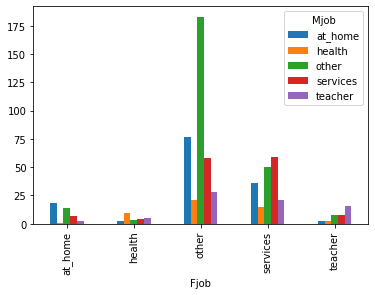

In [409]:
plt.show(cross_job.plot(kind="bar"))

In [88]:
#"reason to choose this school (nominal: close to ""home"", school ""reputation"", 
#""course"" preference or ""other"")"
school[['reason','G3']].groupby("reason").describe()

G3                                                   
            count       mean       std  min    25%   50%   75%   max
reason                                                              
course      285.0  11.547368  3.108717  0.0  10.00  11.0  14.0  18.0
home        149.0  12.181208  2.952447  0.0  11.00  12.0  14.0  19.0
other        72.0  10.694444  3.931236  0.0   9.75  11.0  13.0  18.0
reputation  143.0  12.944056  3.052997  0.0  11.00  13.0  15.0  19.0

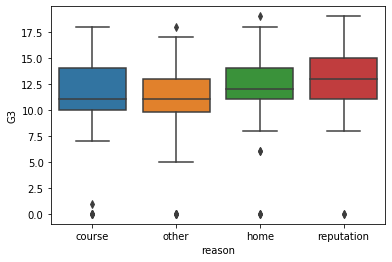

In [413]:
reason = school[['reason','G3']]
sns.boxplot(x='reason', y='G3', data=reason)

In [89]:
#"student's guardian (nominal: ""mother"",  ""father"" or ""other"")"
school[['guardian','G3']].groupby("guardian").describe()

G3                                                  
          count       mean       std  min   25%   50%   75%   max
guardian                                                         
father    153.0  12.202614  3.192012  0.0  11.0  12.0  14.0  19.0
mother    455.0  11.896703  3.279943  0.0  10.0  12.0  14.0  19.0
other      41.0  10.902439  2.624927  0.0  10.0  11.0  12.0  15.0

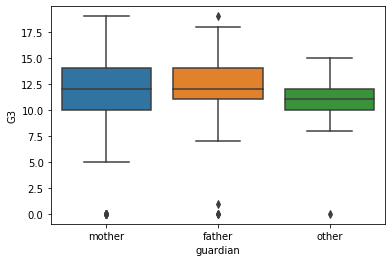

In [414]:
guardian = school[['guardian','G3']]
sns.boxplot(x='guardian', y='G3', data=guardian)

In [90]:
#"home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, 
#or 4 - >1 hour)"
school[['traveltime','G3']].groupby("traveltime").describe()

G3                                                   
            count       mean       std  min   25%   50%    75%   max
traveltime                                                          
1           366.0  12.251366  3.113767  0.0  10.0  12.0  14.00  19.0
2           213.0  11.577465  3.422988  0.0  10.0  11.0  14.00  19.0
3            54.0  11.166667  3.272239  0.0  10.0  11.0  13.00  18.0
4            16.0  10.875000  1.995829  8.0  10.0  11.0  11.25  16.0

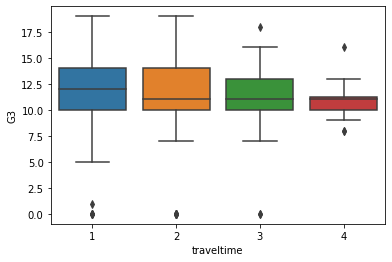

In [415]:
traveltime = school[['traveltime','G3']]
sns.boxplot(x='traveltime', y='G3', data=traveltime)

In [91]:
#"weekly study time ( 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)"
school[['studytime','G3']].groupby("studytime").describe()

G3                                                  
           count       mean       std  min   25%   50%   75%   max
studytime                                                         
1          212.0  10.844340  3.218624  0.0  10.0  11.0  13.0  18.0
2          305.0  12.091803  3.243125  0.0  10.0  12.0  14.0  19.0
3           97.0  13.226804  2.502104  8.0  12.0  13.0  15.0  18.0
4           35.0  13.057143  3.038410  6.0  11.0  13.0  15.0  19.0

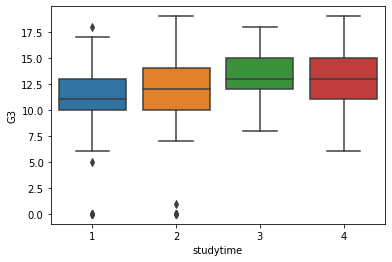

In [416]:
studytime = school[['studytime','G3']]
sns.boxplot(x='studytime', y='G3', data=studytime)

In [105]:
#number of past class failures (numeric: n if 1<=n<3,  else 4)"
school[['failures','G3']].groupby("failures").describe()

G3                                                   
          count       mean       std  min    25%   50%   75%   max
failures                                                          
0         549.0  12.510018  2.828813  0.0  11.00  12.0  14.0  19.0
1          70.0   8.642857  3.443270  0.0   8.00  10.0  10.0  16.0
2          16.0   8.812500  3.208712  0.0   7.75   9.5  10.0  15.0
3          14.0   8.071429  2.786348  0.0   8.00   8.5  10.0  11.0

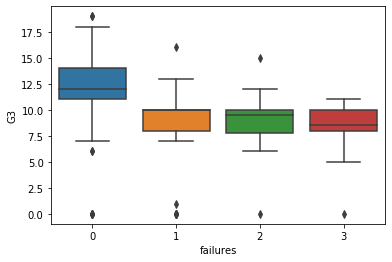

In [417]:
failures = school[['failures','G3']]
sns.boxplot(x='failures', y='G3', data=failures)

In [106]:
#extra educational support (binary: yes or no)
school[['schoolsup','G3']].groupby("schoolsup").describe()

G3                                                  
           count       mean       std  min   25%   50%   75%   max
schoolsup                                                         
no         581.0  11.979346  3.316040  0.0  10.0  12.0  14.0  19.0
yes         68.0  11.279412  2.304088  0.0  10.0  11.0  13.0  18.0

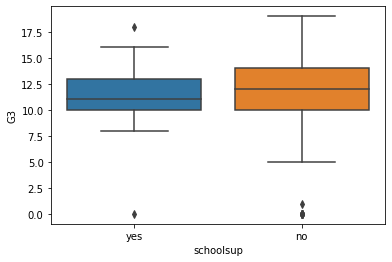

In [418]:
schoolsup = school[['schoolsup','G3']]
sns.boxplot(x='schoolsup', y='G3', data=schoolsup)

In [108]:
#family educational support (binary: yes or no)
school[['famsup','G3']].groupby("famsup").describe()

G3                                                  
        count       mean       std  min   25%   50%   75%   max
famsup                                                         
no      251.0  11.665339  3.602160  0.0  10.0  12.0  14.0  19.0
yes     398.0  12.057789  2.967358  0.0  10.0  12.0  14.0  19.0

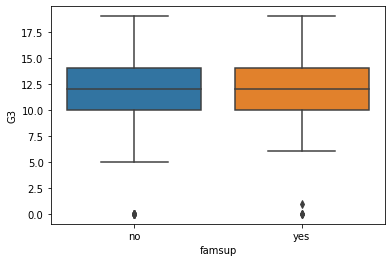

In [419]:
famsup = school[['famsup','G3']]
sns.boxplot(x='famsup', y='G3', data=famsup)

In [109]:
#extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
school[['paid','G3']].groupby("paid").describe()

G3                                                  
      count       mean       std  min   25%   50%   75%   max
paid                                                         
no    610.0  11.950820  3.250496  0.0  10.0  12.0  14.0  19.0
yes    39.0  11.205128  2.848633  0.0  10.0  12.0  13.0  16.0

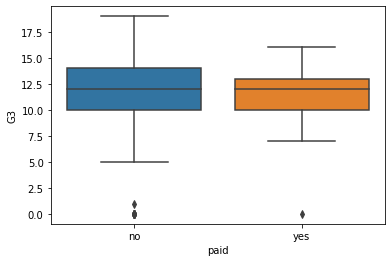

In [420]:
paid = school[['paid','G3']]
sns.boxplot(x='paid', y='G3', data=paid)

In [110]:
#extra-curricular activities (binary: yes or no)
school[['activities','G3']].groupby("activities").describe()

G3                                                  
            count       mean       std  min   25%   50%   75%   max
activities                                                         
no          334.0  11.718563  3.235290  0.0  10.0  11.0  14.0  19.0
yes         315.0  12.104762  3.218944  0.0  10.0  12.0  14.0  19.0

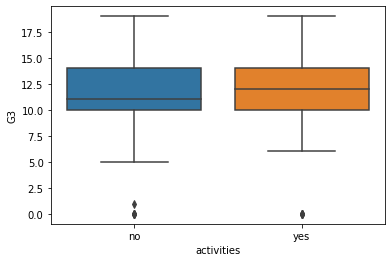

In [421]:
activities = school[['activities','G3']]
sns.boxplot(x='activities', y='G3', data=activities)

In [111]:
#attended nursery school (binary: yes or no)
school[['nursery','G3']].groupby("nursery").describe()

G3                                                  
         count       mean       std  min   25%   50%   75%   max
nursery                                                         
no       128.0  11.718750  3.006391  0.0  10.0  11.0  13.0  19.0
yes      521.0  11.952015  3.284521  0.0  10.0  12.0  14.0  19.0

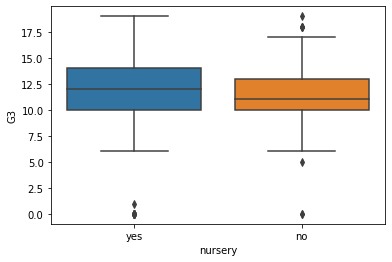

In [422]:
nursery = school[['nursery','G3']]
sns.boxplot(x='nursery', y='G3', data=nursery)

In [114]:
#wants to take higher education (binary: yes or no)
school[['higher','G3']].groupby("higher").describe()

G3                                                   
        count       mean       std  min    25%   50%   75%   max
higher                                                          
no       69.0   8.797101  2.973311  0.0   8.00  10.0  10.0  14.0
yes     580.0  12.275862  3.058402  0.0  10.75  12.0  14.0  19.0

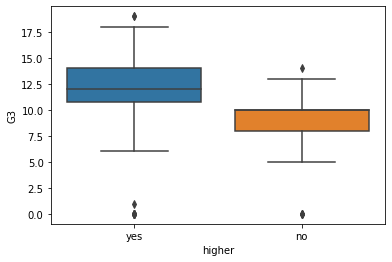

In [423]:
higher = school[['higher','G3']]
sns.boxplot(x='higher', y='G3', data=higher)

In [115]:
#Internet access at home (binary: yes or no)
school[['internet','G3']].groupby("internet").describe()

G3                                                  
          count       mean       std  min   25%   50%   75%   max
internet                                                         
no        151.0  11.026490  3.446635  0.0  10.0  11.0  13.0  19.0
yes       498.0  12.172691  3.117146  0.0  10.0  12.0  14.0  19.0

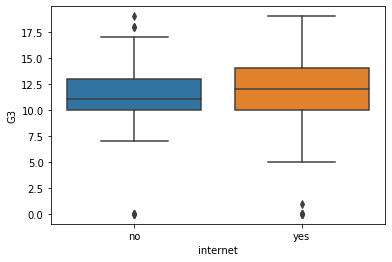

In [424]:
internet = school[['internet','G3']]
sns.boxplot(x='internet', y='G3', data=internet)

In [116]:
#with a romantic relationship (binary: yes or no)
school[['romantic','G3']].groupby("romantic").describe()

G3                                                  
          count       mean       std  min   25%   50%   75%   max
romantic                                                         
no        410.0  12.129268  3.003726  0.0  10.0  12.0  14.0  19.0
yes       239.0  11.523013  3.560771  0.0  10.0  12.0  14.0  18.0

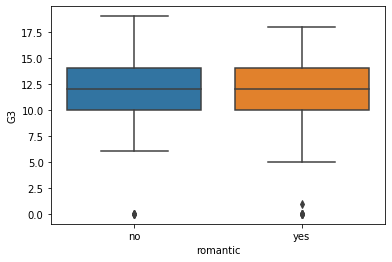

In [425]:
romantic = school[['romantic','G3']]
sns.boxplot(x='romantic', y='G3', data=romantic)

In [117]:
#quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
school[['famrel','G3']].groupby("famrel").describe()

G3                                                  
        count       mean       std  min   25%   50%   75%   max
famrel                                                         
1        22.0  10.636364  3.645551  0.0   9.0  10.5  12.0  17.0
2        29.0  10.862069  3.710257  0.0  10.0  11.0  13.0  16.0
3       101.0  11.594059  3.033738  0.0  10.0  11.0  13.0  19.0
4       317.0  12.343849  2.937923  0.0  10.0  12.0  14.0  18.0
5       180.0  11.633333  3.584417  0.0  10.0  12.0  14.0  18.0

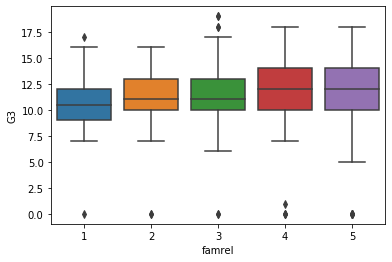

In [426]:
famrel = school[['famrel','G3']]
sns.boxplot(x='famrel', y='G3', data=famrel)

In [118]:
#free time after school (numeric: from 1 - very low to 5 - very high)
school[['freetime','G3']].groupby("freetime").describe()

G3                                                  
          count       mean       std  min   25%   50%   75%   max
freetime                                                         
1          45.0  11.733333  2.499091  7.0  10.0  12.0  13.0  19.0
2         107.0  12.710280  3.458676  0.0  11.0  13.0  15.0  19.0
3         251.0  12.059761  3.041121  0.0  10.0  12.0  14.0  18.0
4         178.0  11.713483  3.064640  0.0  10.0  11.0  14.0  18.0
5          68.0  10.691176  3.982264  0.0   9.0  11.0  13.0  18.0

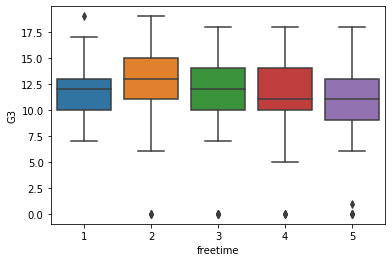

In [427]:
freetime = school[['freetime','G3']]
sns.boxplot(x='freetime', y='G3', data=freetime)

In [119]:
#going out with friends (numeric: from 1 - very low to 5 - very high)
school[['goout','G3']].groupby("goout").describe()

G3                                                   
       count       mean       std  min    25%   50%   75%   max
goout                                                          
1       48.0  10.729167  3.846743  0.0   9.75  11.0  14.0  15.0
2      145.0  12.668966  3.171170  0.0  11.00  13.0  15.0  19.0
3      205.0  12.151220  2.902258  0.0  10.00  12.0  14.0  18.0
4      141.0  11.971631  2.818164  0.0  10.00  12.0  14.0  19.0
5      110.0  10.872727  3.719794  0.0   9.25  11.0  13.0  18.0

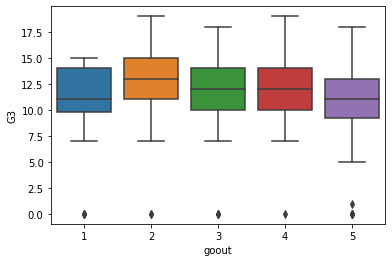

In [428]:
goout = school[['goout','G3']]
sns.boxplot(x='goout', y='G3', data=goout)

In [120]:
#workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
school[['Dalc','G3']].groupby("Dalc").describe()

G3                                                  
      count       mean       std  min   25%   50%   75%   max
Dalc                                                         
1     451.0  12.299335  3.102898  0.0  10.0  12.0  14.0  19.0
2     121.0  11.363636  3.329164  0.0  10.0  11.0  13.0  18.0
3      43.0  11.139535  2.252844  8.0  10.0  11.0  12.0  18.0
4      17.0   8.941176  5.129213  0.0   9.0  11.0  12.0  14.0
5      17.0  10.235294  2.948080  5.0   9.0  10.0  11.0  16.0

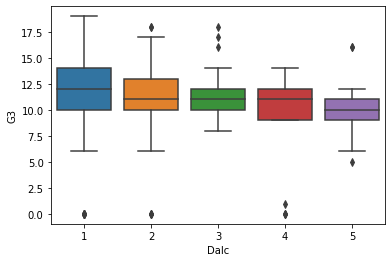

In [429]:
Dalc = school[['Dalc','G3']]
sns.boxplot(x='Dalc', y='G3', data=Dalc)

In [121]:
#weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
school[['Walc','G3']].groupby("Walc").describe()

G3                                                  
      count       mean       std  min   25%   50%   75%   max
Walc                                                         
1     247.0  12.360324  3.057000  0.0  10.0  12.0  14.0  19.0
2     150.0  12.260000  3.085863  0.0  10.0  12.0  14.0  18.0
3     120.0  11.666667  3.642267  0.0  10.0  12.0  14.0  18.0
4      87.0  11.034483  2.805511  0.0  10.0  11.0  13.0  19.0
5      45.0  10.555556  3.583774  0.0   9.0  11.0  12.0  17.0

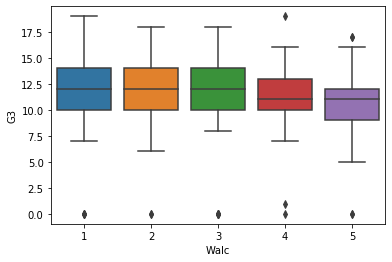

In [431]:
Walc = school[['Walc','G3']]
sns.boxplot(x='Walc', y='G3', data=Walc)

In [122]:
cross_alc = pd.crosstab(school["Dalc"], school["Walc"])
cross_alc

Walc,1,2,3,4,5
Dalc,,,,,
1,241,113,64,28,5
2,3,34,43,34,7
3,1,1,9,20,12
4,1,1,4,5,6
5,1,1,0,0,15


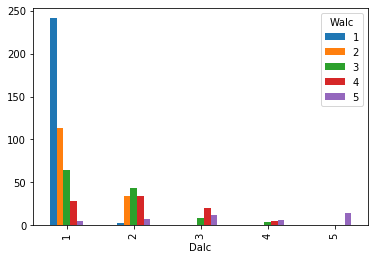

In [432]:
plt.show(cross_alc.plot(kind="bar"))

In [123]:
#current health status (numeric: from 1 - very bad to 5 - very good)
school[['health','G3']].groupby("health").describe()

G3                                                  
        count       mean       std  min   25%   50%   75%   max
health                                                         
1        90.0  12.477778  3.264476  0.0  10.0  13.0  15.0  18.0
2        78.0  12.192308  3.299184  0.0  10.0  12.0  14.0  19.0
3       124.0  11.838710  3.137466  0.0  10.0  12.0  13.0  19.0
4       108.0  12.305556  2.996753  0.0  10.0  13.0  14.0  18.0
5       249.0  11.469880  3.302018  0.0  10.0  11.0  13.0  18.0

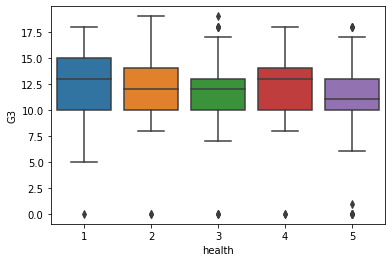

In [433]:
health = school[['health','G3']]
sns.boxplot(x='health', y='G3', data=health)

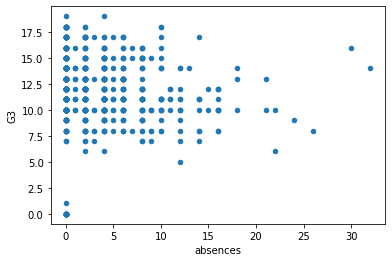

In [440]:
school.plot(x="absences", y="G3", kind="scatter")

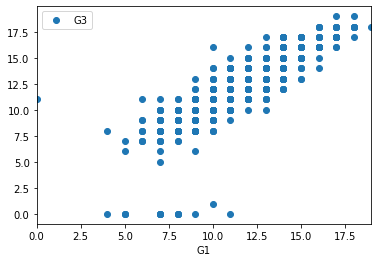

In [133]:
#Exploratory of numerical attributes
school.plot(x='G1', y='G3', style='o')

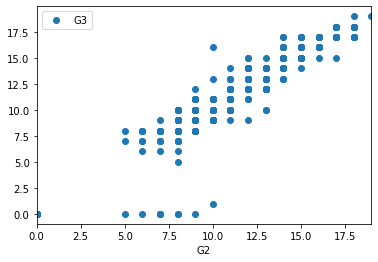

In [132]:
school.plot(x='G2', y='G3', style='o')

In [130]:
#correlation matrix coefficients
corr = school.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


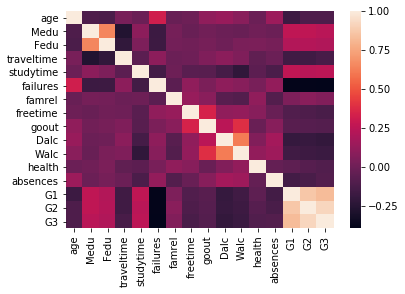

In [127]:
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [131]:
corr['G3']

age          -0.106505
Medu          0.240151
Fedu          0.211800
traveltime   -0.127173
studytime     0.249789
failures     -0.393316
famrel        0.063361
freetime     -0.122705
goout        -0.087641
Dalc         -0.204719
Walc         -0.176619
health       -0.098851
absences     -0.091379
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64

In [ ]:
#Perform standard linear regression on data 

In [205]:
#Get dummies for the original dataset
school_dummy = pd.get_dummies(school)
school_dummy.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [304]:
school_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [246]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
min_max_scaler = mm.fit(school_dummy)
school_norm= min_max_scaler.transform(school_dummy)
school_norm = pd.DataFrame(school_norm, columns=school_dummy.columns)
school_norm.head()

C:\Users\rimo\Anaconda3\Lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.000000,0.25,0.25,0.000000,0.333333,0.0,0.75,0.50,0.25,0.25,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [247]:
school_norm.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.073960,0.732666,0.545069,0.546225,0.125578,...,0.514638,0.485362,0.197227,0.802773,0.106317,0.893683,0.232666,0.767334,0.631741,0.368259
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.197745,0.238929,0.262773,0.293942,0.231209,...,0.500171,0.500171,0.398212,0.398212,0.308481,0.308481,0.422857,0.422857,0.482704,0.482704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.000000,0.750000,0.500000,0.500000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,0.000000,1.000000,0.750000,0.750000,0.250000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [248]:
# Seperate the target attribute
y = school_norm['G3']
y.head()

0    0.578947
1    0.578947
2    0.631579
3    0.736842
4    0.684211
Name: G3, dtype: float64

In [249]:
# Drop the target attribute from the training matrix
x = school_norm.drop(["G3"], axis=1)
x.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.000000,0.25,0.25,0.000000,0.333333,0.0,0.75,0.50,0.25,0.25,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [261]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,0.249175,0.174020,0.0,0.142857,0.285714,0.428571,1.0
Medu,649.0,0.628659,0.283638,0.0,0.500000,0.500000,1.000000,1.0
Fedu,649.0,0.576656,0.274983,0.0,0.250000,0.500000,0.750000,1.0
traveltime,649.0,0.189522,0.249553,0.0,0.000000,0.000000,0.333333,1.0
studytime,649.0,0.310221,0.276503,0.0,0.000000,0.333333,0.333333,1.0
failures,649.0,0.073960,0.197745,0.0,0.000000,0.000000,0.000000,1.0
famrel,649.0,0.732666,0.238929,0.0,0.750000,0.750000,1.000000,1.0
freetime,649.0,0.545069,0.262773,0.0,0.500000,0.500000,0.750000,1.0
goout,649.0,0.546225,0.293942,0.0,0.250000,0.500000,0.750000,1.0
Dalc,649.0,0.125578,0.231209,0.0,0.000000,0.000000,0.250000,1.0


In [254]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [255]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [256]:
# Let's see predictions for the first 10 instances
print(linreg.predict(x[:10]))

[0.528 0.586 0.646 0.774 0.704 0.66  0.656 0.714 0.916 0.671]


In [257]:
# Compute RMSE on training data
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print (err[:10])

0    0.050383
1    0.007967
2    0.014661
3    0.037572
4    0.019647
5    0.024543
6    0.027716
7    0.030145
8    0.021035
9    0.013068
Name: G3, dtype: float64


In [258]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)

0.0658553162615258


In [259]:
# We can view the regression coefficients
print ('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 1.055e-02  1.592e-03  1.540e-02  3.358e-02  2.871e-03 -2.944e-02 -7.483e-03
 -7.978e-03 -1.071e-02 -1.443e-02  8.678e-04 -8.691e-03 -2.246e-02  1.230e-01
  8.774e-01  3.807e+11  3.807e+11  4.646e+11  4.646e+11 -4.826e+11 -4.826e+11
 -1.993e+11 -1.993e+11 -6.183e+11 -6.183e+11  5.058e+11  5.058e+11  5.058e+11
  5.058e+11  5.058e+11  8.383e+11  8.383e+11  8.383e+11  8.383e+11  8.383e+11
 -3.338e+11 -3.338e+11 -3.338e+11 -3.338e+11  3.431e+11  3.431e+11  3.431e+11
  2.791e+11  2.791e+11 -5.893e+10 -5.893e+10  5.066e+10  5.066e+10  5.617e+10
  5.617e+10 -3.997e+10 -3.997e+10  1.638e+11  1.638e+11 -3.254e+10 -3.254e+10
  5.417e+10  5.417e+10]


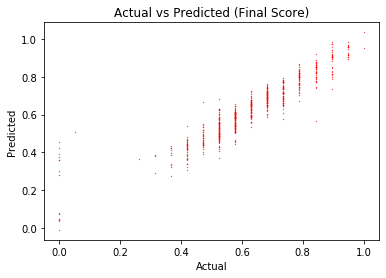

In [262]:
#correlation between the predicted and actual values of the target attribute.
import matplotlib.pyplot as plot
plot.scatter(y, p, color = 'red', s=0.1)
plot.title('Actual vs Predicted (Final Score)')
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.show()

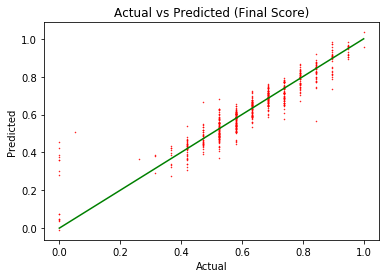

In [263]:
import pylab as pl
# Plot outputs
%matplotlib inline
pl.plot( y, p,'ro',markersize=0.5)
pl.plot([0,1],[0,1], 'g-')
plot.title('Actual vs Predicted (Final Score)')
pl.xlabel('Actual')
pl.ylabel('Predicted')
pl.show()

In [ ]:
# 10-fold crossvalidation were performed to compare the cross-validation RMSE to the training
# RMSE using KFoldmodule from sklearn.model_selection

In [302]:
from sklearn.model_selection import KFold
x = np.array(x)
y = np.array(y)
n = 10
kf = KFold(n_splits=n)
xval_err = 0
for train,test in kf.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

In [303]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.0659
RMSE on 10-fold CV: 0.0664


In [1]:
#Using scikit-learn regression model from sklearn.linear_model, a function was created to takes
#as input the training data, target variable, number of cross validations, the model method, and 
#percentile step. The script returns the optimal percentage of the most informative features to 
#use. feature_selection.SelectPercentile was used to find the most informative variables. 
#The mean scores was determined using model_selection.cross_val_score.

In [305]:
from sklearn import feature_selection
x = school_norm.drop(["G3"], axis=1)
y = school_norm['G3']

In [324]:
from sklearn import model_selection

def feature_select(x_train, target, crossv, model, percentile_step):
    if model == 'regression':
        method = LinearRegression()
        feature_method = feature_selection.f_regression
        
    percentiles = np.array(range(1, 100, percentile_step))
    results = []
    columns = []
    f = []
    for i in range(1, 100, percentile_step):
        fs = feature_selection.SelectPercentile(feature_method, percentile=i)
        x_train_fs = fs.fit_transform(x_train, target)
        scores = model_selection.cross_val_score(method, x_train_fs, target, cv=crossv, scoring='neg_mean_absolute_error')
        pos_score = 1 + scores 
        #print (i,pos_score.mean())
        results = np.append(results, pos_score.mean())
        array = (x_train.columns[fs.get_support()].values).tolist()
        columns += [array]
        f_list = []
        for ii in range(len(array)):
            f_list.append(fs.scores_[ii])
        f += [f_list]
        
    optimal_percentile = np.where(results == results.max())[0]
    
    print('The most informative variables and their weights are:', "\n")
    for i in range(len(columns[int(optimal_percentile)])):
        print(columns[int(optimal_percentile)][i],'\t', f[int(optimal_percentile)][i] )
    
    print("\n")
    print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
    optimal_num_features = int(percentiles[optimal_percentile]*len(x.columns)/100) +1
    print ("Optimal number of features:{0}".format(optimal_num_features), "\n")
    
    # Plot percentile of features VS. cross-validation scores
    import pylab as pl
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("Cross validation Mean Absolute Error")
    pl.plot(percentiles,results)

The most informative variables and their weights are: 

failures 	 7.423385071195365
G1 	 39.59772918378967
G2 	 30.386972706316584
higher_no 	 10.635921741608422


Optimal percentile of features:[6] 

Optimal number of features:4 



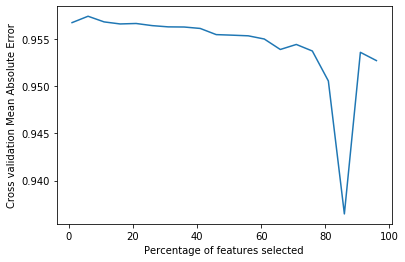

In [325]:
feature_select(x, y, 5,'regression',5)

In [2]:
#Ridge regression was then performed to avoid the problem of overfitting and the failure to find 
#unique solutions. Ridge help improve the model and add a penalty to avoid extracting noise. 
#Lasso Regression using the modules from sklearn.linear_model was implemented in addition to 
#performing systematic model selection to identify the optimal alpha parameter. 
#A 20%-80% randomized data split was used to set aside the test portion and use it later for
#testing purposes to evaluate the model. Only the 80% randomized chosen data will be used for 
#training the model. A function will then be created to take the training data, target variable,
#number of cross validations, and model method to be trained (Lasso or Regression). 
#The script runs to find the optimal alpha that has the least average of RMSE on n numbers of
#cross validations and RMSE on the training set. Furthermore, error values (RMSE) on the training
#and cross-validation splits were plotted across the specified values of the alpha parameters.


In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [327]:
X_trainp = np.array(X_train)
y_trainp = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [334]:
def select_model(trainp, targetp, name, ncv):
    
    if name == 'ridge':
        print('Ridge Regression')
        print('alpha\t RMSE_train\t RMSE_{}cv\n'.format(ncv))
    elif name == 'lasso':
        print('Lasso Regression\n')
        print('alpha\t RMSE_train\t RMSE_5cv\n')
    alpha = np.linspace(.01,20,50)
    t_rmse = np.array([])
    cv_rmse = np.array([])
    avg_rmse = np.array([])
    optimal = np.array([])
    
    for a in alpha:

        if name == 'lasso':
            met = Lasso(alpha=a)
        elif name == 'ridge':
            met = Ridge(alpha=a)

        # computing the RMSE on training data
        met.fit(trainp,targetp)
        p = met.predict(trainp)
        err = p-targetp
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

        # computing RMSE using ncv-fold cross validation
        kf = KFold(n_splits=ncv)
        xval_err = 0
        for train, test in kf.split(trainp):
            met.fit(trainp[train], targetp[train])
            p = met.predict(trainp[test])
            err = p - targetp[test]
            xval_err += np.sqrt(np.dot(err,err)/len(trainp[test]))
        
        rmse_ncv = xval_err/ncv
        rmse_avg = (rmse_ncv+rmse_train)/2
        optimal = np.append(optimal, [a])
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_ncv])
        avg_rmse = np.append(avg_rmse, [rmse_avg])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_ncv))
    
    optimal_avg_rmse = avg_rmse[np.where(avg_rmse == avg_rmse.min())[0]][0]
    optimal_alpha = optimal[np.where(avg_rmse == avg_rmse.min())[0]][0]
    print('Optimal alpha = {:.3f} with RMSE avarage = {:.5f}'.format(optimal_alpha,optimal_avg_rmse))
    
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()
    return(optimal_alpha)    

Ridge Regression
alpha	 RMSE_train	 RMSE_5cv

0.010	 0.0664		 0.0725
0.418	 0.0668		 0.0727
0.826	 0.0674		 0.0736
1.234	 0.0682		 0.0746
1.642	 0.0689		 0.0757
2.050	 0.0697		 0.0768
2.458	 0.0706		 0.0779
2.866	 0.0714		 0.0790
3.274	 0.0722		 0.0800
3.682	 0.0730		 0.0811
4.090	 0.0738		 0.0822
4.498	 0.0746		 0.0832
4.906	 0.0754		 0.0842
5.313	 0.0762		 0.0852
5.721	 0.0770		 0.0861
6.129	 0.0778		 0.0871
6.537	 0.0786		 0.0880
6.945	 0.0793		 0.0889
7.353	 0.0800		 0.0897
7.761	 0.0808		 0.0906
8.169	 0.0815		 0.0914
8.577	 0.0821		 0.0922
8.985	 0.0828		 0.0929
9.393	 0.0835		 0.0937
9.801	 0.0841		 0.0944
10.209	 0.0848		 0.0951
10.617	 0.0854		 0.0958
11.025	 0.0860		 0.0964
11.433	 0.0866		 0.0971
11.841	 0.0872		 0.0977
12.249	 0.0878		 0.0983
12.657	 0.0883		 0.0989
13.065	 0.0889		 0.0995
13.473	 0.0894		 0.1000
13.881	 0.0899		 0.1006
14.289	 0.0904		 0.1011
14.697	 0.0910		 0.1016
15.104	 0.0914		 0.1021
15.512	 0.0919		 0.1026
15.920	 0.0924		 0.1031
16.328	 0.0929		 0.

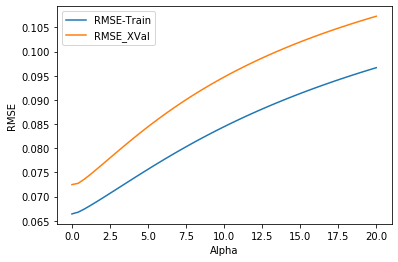

In [335]:
#Setting up optimal alpha to apply on the test set using ridge regression
alpha_r = select_model(X_trainp, y_trainp, 'ridge', 5)

In [336]:
# Create linear regression object with a ridge coefficient equals to optimal alpha_r
ridge_test = Ridge(fit_intercept=True, alpha=alpha_r)

# Train the model using the training set
ridge_test.fit(X_trainp,y_trainp)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [337]:
# Compute RMSE on testing data
p = ridge_test.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))


method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on testing: %.4f' %rmse_test)

Method: Ridge Regression
RMSE on testing: 0.0536


Lasso Regression

alpha	 RMSE_train	 RMSE_5cv

0.010	 0.0976		 0.0986
0.418	 0.1647		 0.1650
0.826	 0.1647		 0.1650
1.234	 0.1647		 0.1650
1.642	 0.1647		 0.1650
2.050	 0.1647		 0.1650
2.458	 0.1647		 0.1650
2.866	 0.1647		 0.1650
3.274	 0.1647		 0.1650
3.682	 0.1647		 0.1650
4.090	 0.1647		 0.1650
4.498	 0.1647		 0.1650
4.906	 0.1647		 0.1650
5.313	 0.1647		 0.1650
5.721	 0.1647		 0.1650
6.129	 0.1647		 0.1650
6.537	 0.1647		 0.1650
6.945	 0.1647		 0.1650
7.353	 0.1647		 0.1650
7.761	 0.1647		 0.1650
8.169	 0.1647		 0.1650
8.577	 0.1647		 0.1650
8.985	 0.1647		 0.1650
9.393	 0.1647		 0.1650
9.801	 0.1647		 0.1650
10.209	 0.1647		 0.1650
10.617	 0.1647		 0.1650
11.025	 0.1647		 0.1650
11.433	 0.1647		 0.1650
11.841	 0.1647		 0.1650
12.249	 0.1647		 0.1650
12.657	 0.1647		 0.1650
13.065	 0.1647		 0.1650
13.473	 0.1647		 0.1650
13.881	 0.1647		 0.1650
14.289	 0.1647		 0.1650
14.697	 0.1647		 0.1650
15.104	 0.1647		 0.1650
15.512	 0.1647		 0.1650
15.920	 0.1647		 0.1650
16.328	 0.1647		 0

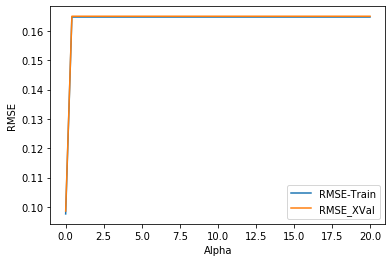

In [339]:
#Setting up optimal alpha to apply on the test set using lasso regression
alpha_l = select_model(X_trainp, y_trainp, 'lasso', 5)

In [340]:
# Create linear regression object with a lasso coefficient equals to optimal alpha_l
lasso_test = Lasso(fit_intercept=True, alpha=alpha_l)

# Train the model using the training set
lasso_test.fit(X_trainp,y_trainp)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [341]:
# Compute RMSE on testing data
p = lasso_test.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))


method_name = 'Lasso Regression'
print('Method: %s' %method_name)
print('RMSE on testing: %.4f' %rmse_test)

Method: Lasso Regression
RMSE on testing: 0.1007
